In [240]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import PolynomialFeatures
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
import numpy as np
import sklearn.preprocessing as sp
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix , precision_score, recall_score,f1_score


In [241]:
path = "C:\\Users\\butym\\Downloads\\testing data13.csv"
df=pd.read_csv(path)

In [242]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,40513.35139,2.55,17850.0,United Kingdom,NaN
1,536365,71053,WHITE METAL LANTERN,6,40513.35139,3.39,17850.0,United Kingdom,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,40513.35139,2.75,17850.0,United Kingdom,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,40513.35139,3.39,17850.0,United Kingdom,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,40513.35139,3.39,17850.0,United Kingdom,NaN
...,...,...,...,...,...,...,...,...,...
1447,536539,37495,FAIRY CAKE BIRTHDAY CANDLE SET,4,40513.58542,3.75,15165.0,United Kingdom,NaN
1448,536539,37495,FAIRY CAKE BIRTHDAY CANDLE SET,4,40513.58542,3.75,15165.0,United Kingdom,NaN
1449,536539,37495,FAIRY CAKE BIRTHDAY CANDLE SET,4,40513.58542,3.75,15165.0,United Kingdom,NaN
1450,536539,37495,FAIRY CAKE BIRTHDAY CANDLE SET,4,40513.58542,3.75,15165.0,United Kingdom,NaN


In [243]:
df.head() #return top 5 rows of data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,40513.35139,2.55,17850.0,United Kingdom,NaN
1,536365,71053,WHITE METAL LANTERN,6,40513.35139,3.39,17850.0,United Kingdom,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,40513.35139,2.75,17850.0,United Kingdom,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,40513.35139,3.39,17850.0,United Kingdom,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,40513.35139,3.39,17850.0,United Kingdom,NaN


In [244]:
df.shape

(1452, 9)

In [245]:
df.isnull()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
0,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...
1447,False,False,False,False,False,False,False,False,True
1448,False,False,False,False,False,False,False,False,True
1449,False,False,False,False,False,False,False,False,True
1450,False,False,False,False,False,False,False,False,True


In [246]:
df.info

<bound method DataFrame.info of      InvoiceNo StockCode                          Description  Quantity  \
0       536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1       536365     71053                  WHITE METAL LANTERN         6   
2       536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3       536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4       536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...        ...       ...                                  ...       ...   
1447    536539     37495       FAIRY CAKE BIRTHDAY CANDLE SET         4   
1448    536539     37495       FAIRY CAKE BIRTHDAY CANDLE SET         4   
1449    536539     37495       FAIRY CAKE BIRTHDAY CANDLE SET         4   
1450    536539     37495       FAIRY CAKE BIRTHDAY CANDLE SET         4   
1451    536539     37495       FAIRY CAKE BIRTHDAY CANDLE SET         4   

      InvoiceDate  UnitPrice  CustomerID         Country  Unnamed: 

In [247]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Unnamed: 8
count,1452.000000,1452.000000,1452.000000,1451.000000,0.0
mean,11.524793,40513.498983,3.097755,15619.272226,NaN
std,32.695661,0.056963,5.157588,1843.145059,NaN
min,-24.000000,40513.351390,0.000000,12431.000000,NaN
25%,2.000000,40513.472920,1.250000,14307.000000,NaN
50%,4.000000,40513.505560,2.100000,15525.000000,NaN
75%,12.000000,40513.537500,3.750000,17850.000000,NaN
max,600.000000,40513.585420,165.000000,18144.000000,NaN


In [248]:
df.isnull().sum()

InvoiceNo         0
StockCode         0
Description       1
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        1
Country           0
Unnamed: 8     1452
dtype: int64

In [249]:
df_1=pd.read_csv(path,names=[1,2,3,4,5,6,7,8])

df_1

In [250]:
df_1


,1,2,3,4,5,6,7,8
InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,NaN
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,40513.35139,2.55,17850,United Kingdom,NaN
536365,71053,WHITE METAL LANTERN,6,40513.35139,3.39,17850,United Kingdom,NaN
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,40513.35139,2.75,17850,United Kingdom,NaN
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,40513.35139,3.39,17850,United Kingdom,NaN
...,...,...,...,...,...,...,...,...
536539,37495,FAIRY CAKE BIRTHDAY CANDLE SET,4,40513.58542,3.75,15165,United Kingdom,NaN
536539,37495,FAIRY CAKE BIRTHDAY CANDLE SET,4,40513.58542,3.75,15165,United Kingdom,NaN
536539,37495,FAIRY CAKE BIRTHDAY CANDLE SET,4,40513.58542,3.75,15165,United Kingdom,NaN
536539,37495,FAIRY CAKE BIRTHDAY CANDLE SET,4,40513.58542,3.75,15165,United Kingdom,NaN


In [251]:
len(df)

1452

In [252]:
df[6:15]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,40513.35139,4.25,17850.0,United Kingdom,NaN
7,536366,22633,HAND WARMER UNION JACK,6,40513.35278,1.85,17850.0,United Kingdom,NaN
8,536366,22632,HAND WARMER RED POLKA DOT,6,40513.35278,1.85,17850.0,United Kingdom,NaN
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,40513.35694,1.69,13047.0,United Kingdom,NaN
10,536367,22745,POPPY'S PLAYHOUSE BEDROOM,6,40513.35694,2.10,13047.0,United Kingdom,NaN
11,536367,22748,POPPY'S PLAYHOUSE KITCHEN,6,40513.35694,2.10,13047.0,United Kingdom,NaN
12,536367,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,8,40513.35694,3.75,13047.0,United Kingdom,NaN
13,536367,22310,IVORY KNITTED MUG COSY,6,40513.35694,1.65,13047.0,United Kingdom,NaN
14,536367,84969,BOX OF 6 ASSORTED COLOUR TEASPOONS,6,40513.35694,4.25,13047.0,United Kingdom,NaN


In [253]:
df.fillna(value=0)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,40513.35139,2.55,17850.0,United Kingdom,0.0
1,536365,71053,WHITE METAL LANTERN,6,40513.35139,3.39,17850.0,United Kingdom,0.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,40513.35139,2.75,17850.0,United Kingdom,0.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,40513.35139,3.39,17850.0,United Kingdom,0.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,40513.35139,3.39,17850.0,United Kingdom,0.0
...,...,...,...,...,...,...,...,...,...
1447,536539,37495,FAIRY CAKE BIRTHDAY CANDLE SET,4,40513.58542,3.75,15165.0,United Kingdom,0.0
1448,536539,37495,FAIRY CAKE BIRTHDAY CANDLE SET,4,40513.58542,3.75,15165.0,United Kingdom,0.0
1449,536539,37495,FAIRY CAKE BIRTHDAY CANDLE SET,4,40513.58542,3.75,15165.0,United Kingdom,0.0
1450,536539,37495,FAIRY CAKE BIRTHDAY CANDLE SET,4,40513.58542,3.75,15165.0,United Kingdom,0.0


In [254]:
df['Quantity'].mean()

11.524793388429751

In [255]:
df['Quantity'].max()

600

In [256]:
df['Quantity'].min()

-24

In [257]:
df['Quantity'].mode()

0    1
Name: Quantity, dtype: int64

In [258]:
df['Quantity'].median()

4.0

In [259]:
df.sort_values(by="Quantity",ascending=False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
730,536437,17021,NAMASTE SWAGAT INCENSE,600,40513.50833,0.24,13694.0,United Kingdom,NaN
870,536477,21137,BLACK RECORD COVER FRAME,480,40513.51875,3.39,16210.0,United Kingdom,NaN
182,536387,21731,RED TOADSTOOL LED NIGHT LIGHT,432,40513.41528,1.25,16029.0,United Kingdom,NaN
181,536387,22466,FAIRY TALE COTTAGE NIGHTLIGHT,432,40513.41528,1.45,16029.0,United Kingdom,NaN
219,536390,20668,DISCO BALL CHRISTMAS DECORATION,288,40513.42986,0.10,17511.0,United Kingdom,NaN
...,...,...,...,...,...,...,...,...,...
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,40513.43333,1.65,17548.0,United Kingdom,NaN
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,40513.43333,1.65,17548.0,United Kingdom,NaN
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,40513.43333,0.29,17548.0,United Kingdom,NaN
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,40513.43333,0.29,17548.0,United Kingdom,NaN


In [260]:
df.sort_values(by="Quantity",ascending=True)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,40513.43333,0.29,17548.0,United Kingdom,NaN
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,40513.43333,0.29,17548.0,United Kingdom,NaN
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,40513.43333,0.29,17548.0,United Kingdom,NaN
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,40513.43333,1.65,17548.0,United Kingdom,NaN
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,40513.43333,1.65,17548.0,United Kingdom,NaN
...,...,...,...,...,...,...,...,...,...
219,536390,20668,DISCO BALL CHRISTMAS DECORATION,288,40513.42986,0.10,17511.0,United Kingdom,NaN
181,536387,22466,FAIRY TALE COTTAGE NIGHTLIGHT,432,40513.41528,1.45,16029.0,United Kingdom,NaN
182,536387,21731,RED TOADSTOOL LED NIGHT LIGHT,432,40513.41528,1.25,16029.0,United Kingdom,NaN
870,536477,21137,BLACK RECORD COVER FRAME,480,40513.51875,3.39,16210.0,United Kingdom,NaN


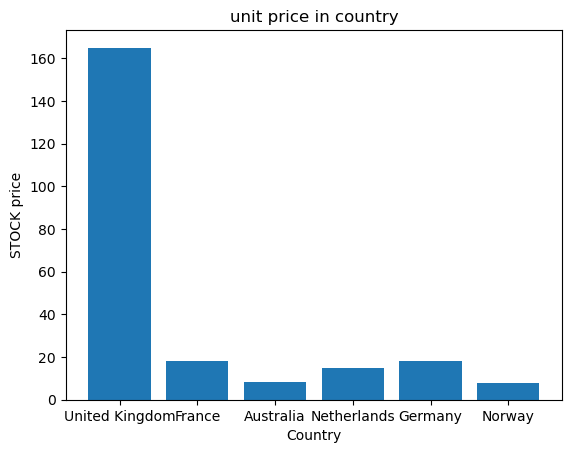

In [265]:
x=df['Country']
y=df['UnitPrice']
plt.xlabel('Country')
plt.ylabel('STOCK price')
plt.title('unit price in country')
plt.bar(x,y)
plt.show()

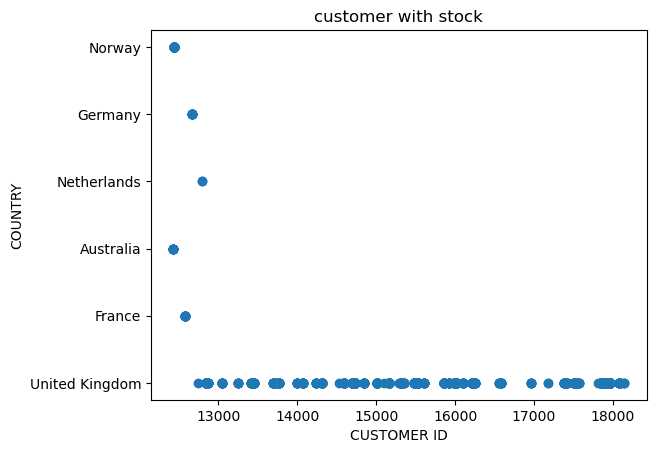

In [267]:
x=df['CustomerID']
y=df['Country']
plt.xlabel('CUSTOMER ID')
plt.ylabel('COUNTRY')
plt.title('customer with stock')
plt.scatter(x,y)
plt.show()

In [268]:
y=df.iloc[:,7:8]
encoder=sp.LabelEncoder()
y1=encoder.fit_transform(y).reshape(-1,1)
y1=pd.DataFrame(y1,columns=['Country'])
y1


C:\Users\butym\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Country
0,5
1,5
2,5
3,5
4,5
...,...
1447,5
1448,5
1449,5
1450,5


In [269]:
x=df.iloc[:,3:4]
x1=encoder.fit_transform(x).reshape(-1,1)
x1=pd.DataFrame(x1,columns=['StockCode'])
x1

C:\Users\butym\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,StockCode
0,9
1,9
2,11
3,9
4,9
...,...
1447,7
1448,7
1449,7
1450,7


In [270]:
train_x,test_x,train_y,test_y=train_test_split(x1,y1)

In [271]:
from sklearn.metrics import confusion_matrix

In [272]:
model=lm.LogisticRegression()
model.fit(train_x,train_y)
pred_y=model.predict(test_x)
conf_mx=confusion_matrix(test_y,pred_y)
conf_mx

C:\Users\butym\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[  0,   0,   0,   0,   0,   4],
       [  0,   0,   0,   0,   0,   7],
       [  0,   0,   0,   0,   0,   3],
       [  0,   0,   0,   0,   0,   1],
       [  0,   0,   0,   0,   0,  15],
       [  0,   0,   0,   0,   2, 331]], dtype=int64)

In [273]:
accuracy_score(test_y,pred_y)


0.9118457300275482

In [274]:
def calculate_metrics(test_y, y_pred):
    accuracy = accuracy_score(test_y, y_pred)
    precision = precision_score(test_y, y_pred)
    recall = recall_score(test_y, y_pred)
    f1 = f1_score(test_y, y_pred)
    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 score': f1
    }

In [275]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100)
# Train the classifier
rf_classifier.fit(train_x, train_y)
# Make predictions on the test set
pred_y2 = rf_classifier.predict(test_x)

C:\Users\butym\AppData\Local\Temp\ipykernel_1204\377710305.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(train_x, train_y)


In [276]:
recall_score(test_y,pred_y2,average=None)
f1_score(test_y,pred_y2,average=None)
accuracy_score(test_y,pred_y2)

0.9173553719008265

In [277]:
# Create a K-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn_classifier.fit(train_x, train_y)

# Make predictions on the test set
y_pred_knn = knn_classifier.predict(test_x)

C:\Users\butym\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [278]:

accuracy_score(test_y,y_pred_knn)

0.9146005509641874

In [279]:
nb_classifier=GaussianNB()
nb_classifier.fit(train_x,train_y)
y_prd_nb= nb_classifier.predict(test_x)

C:\Users\butym\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [280]:
accuracy_score(test_y,y_prd_nb)

0.7327823691460055